In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/

/content/gdrive


In [4]:
%ls

MyDrive/


In [5]:
cd MyDrive/


/content/gdrive/MyDrive


In [6]:
%cd DEEPML/

/content/gdrive/MyDrive/DEEPML


In [7]:
%ls

images5DEEP/  images5DEEP.zip  raw_image/  raw_image.zip  Untitled0.ipynb


In [ ]:
# !unzip 'images5DEEP.zip' -d 'images5DEEP'

In [8]:
%cd images5DEEP

/content/gdrive/MyDrive/DEEPML/images5DEEP


In [9]:
%ls

raw_image.zip  readme.txt


In [10]:
%cd raw_image/

[Errno 2] No such file or directory: 'raw_image/'
/content/gdrive/MyDrive/DEEPML/images5DEEP


In [11]:
%ls

raw_image.zip  readme.txt


In [12]:
%cd raw_image/

[Errno 2] No such file or directory: 'raw_image/'
/content/gdrive/MyDrive/DEEPML/images5DEEP


In [13]:
%ls

raw_image.zip  readme.txt


In [17]:
%pwd

'/content/gdrive/My Drive/DEEPML/images5DEEP/raw_image/raw_image'

In [14]:
!unzip 'raw_image.zip' -d 'raw_image'

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: raw_image/raw_image/train_data/2/2_img_1553496405917.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553497013073.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496781477.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496901646.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496588399.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496439744.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496618726.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553497062846.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496900564.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496483596.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496874583.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553497123832.jpg  
  inflating: raw_image/raw_image/train_data/2/2_img_1553496635850.jpg  
  inflating: raw_image/raw_image/trai

In [15]:
%cd raw_image/

/content/gdrive/My Drive/DEEPML/images5DEEP/raw_image


In [16]:
%ls
%pwd

__MACOSX/  raw_image/


'/content/gdrive/My Drive/DEEPML/images5DEEP/raw_image'

In [ ]:
%cd ~

/root


In [ ]:
%cd ..

/


In [ ]:
%cd content/

/content


In [31]:
!pip install q keras==1.2.2

     |████████████████████████████████| 184kB 7.8MB/s 
  Created wheel for keras: filename=Keras-1.2.2-cp37-none-any.whl size=209602 sha256=299f46064bdfc5b68466c1f836f625b2b220fa575091c0fa480ff45b88932bfb
  Stored in directory: /root/.cache/pip/wheels/55/07/cf/b32db0a8d243b2fd6759d5d7cb650aa20670b2b740209cbf7e
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 1.2.2 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [17]:
# 读取图像信息
import shutil
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


# 调试  在PyCharm中显示绘图
# import matplotlib
# matplotlib.use('Agg')
# 图像增强
from keras.preprocessing.image import ImageDataGenerator



In [18]:
train_data_path = '/content/gdrive/My Drive/DEEPML/images5DEEP/raw_image/raw_image/train_data/'
test_data_path = '/content/gdrive/My Drive/DEEPML/images5DEEP/raw_image/raw_image/test_data/'

In [19]:
# 声明一个ImageDataGenerator类对象，并给出你需要进行的数据增强选项
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# 调用.flow_from_director()方法，第一个为数据集路径。生成数据集及标签
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
# 用同样的方法加载测试集
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')



Found 50000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [20]:
batch_size = 256
num_classes = 10
epochs = 50

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [22]:
history = model.fit_generator(train_generator, 
                           steps_per_epoch=batch_size, 
                           epochs=epochs,
                           verbose=1,
                           validation_data=test_generator, 
                           shuffle=True)
score = model.evaluate(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
256/256 [==============================] - 214s 722ms/step - loss: 2.4634 - accuracy: 0.1016 - val_loss: 2.3014 - val_accuracy: 0.1114
Epoch 2/50
256/256 [==============================] - 185s 725ms/step - loss: 2.2723 - accuracy: 0.1422 - val_loss: 2.0592 - val_accuracy: 0.2546
Epoch 3/50
256/256 [==============================] - 185s 723ms/step - loss: 2.0919 - accuracy: 0.2571 - val_loss: 1.9658 - val_accuracy: 0.2948
Epoch 4/50
256/256 [==============================] - 184s 719ms/step - loss: 2.0033 - accuracy: 0.2769 - val_loss: 1.9407 - val_accuracy: 0.2968
Epoch 5/50
256/256 [==============================] - 184s 720ms/step - loss: 2.0008 - accuracy: 0.2849 - val_loss: 1.8125 - val_accuracy: 0.3532
Epoch 6/50
256/256 [==============================] - 187s 730ms/step - loss: 1.9077 - accuracy: 0.3097 - val_loss: 1.8041 - val_accuracy: 0.3648
Epoch 7/50
256/256 [==============================] - 187s 732ms/step - loss: 1.8614 - accuracy: 0.3495 - val_loss: 1.7376 -

In [23]:
# 打印  loss和acc
print('Test loss', score[0])
print('Test accuracy',score[1])

Test loss 1.314635992050171
Test accuracy 0.5418000221252441


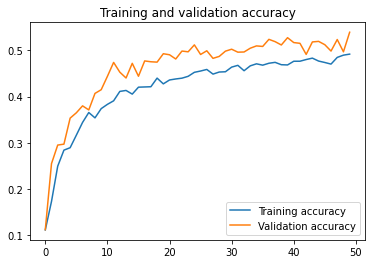

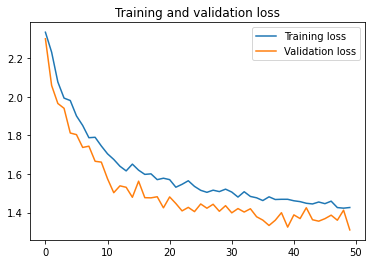

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()